In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving ETH-USD.csv to ETH-USD.csv
User uploaded file "ETH-USD.csv" with length 172876 bytes


In [ ]:
import io
df = pd.read_csv(io.StringIO(uploaded['ETH-USD.csv'].decode('utf-8')))
df.head()

,date,timestamp,adjclose,low,open,volume,close,high
0,11/9/2017,11/9/2017 0:00,320.884003,307.056000,308.644989,893249984,320.884003,329.451996
1,11/10/2017,11/10/2017 0:00,299.252991,294.541992,320.670990,885985984,299.252991,324.717987
2,11/11/2017,11/11/2017 0:00,314.681000,298.191986,298.585999,842300992,314.681000,319.453003
3,11/12/2017,11/12/2017 0:00,307.907989,298.513000,314.690002,1613479936,307.907989,319.153015
4,11/13/2017,11/13/2017 0:00,316.716003,307.024994,307.024994,1041889984,316.716003,328.415008


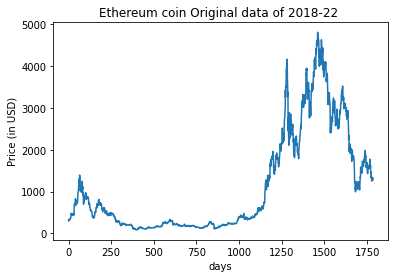

In [ ]:

plt.plot(df.index, df['adjclose'])
plt.title('Ethereum coin Original data of 2018-22 ')
plt.xlabel('days')
plt.ylabel('Price (in USD)')
plt.show()

In [ ]:
# Converting the'x'variable i.e. the Days column in to date-time format, to be treated as the index of Y here.
df['timestamp'] = pd.to_datetime(df["timestamp"])
df.set_index('timestamp', inplace = True)

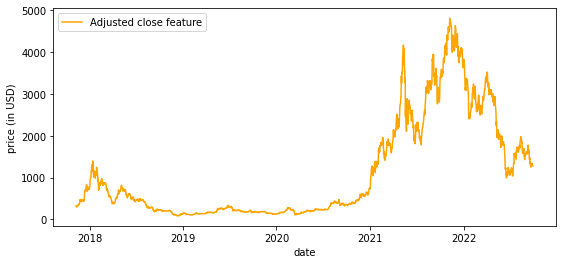

In [ ]:
plt.figure(figsize=(9,4))
plt.plot(df['adjclose'],color='orange', label= 'Adjusted close feature')
plt.xlabel("date")
plt.ylabel('price (in USD)')
plt.legend()
plt.show()

Text(0, 0.5, 'price (in USD)')

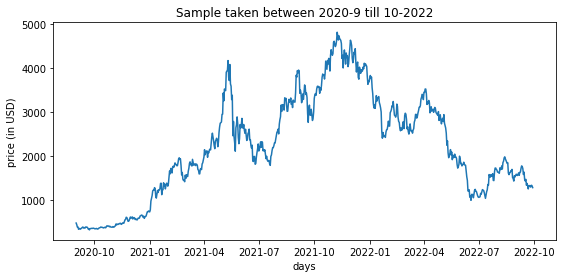

In [ ]:
plt.figure(figsize=(9,4))
df = df.loc['2020-9' : '2022']
plt.plot(df['adjclose'])
plt.title("Sample taken between 2020-9 till 10-2022" )
plt.xlabel("days")
plt.ylabel("price (in USD)")

In [ ]:
# Dataset with date index (X - independent variable)
df['adjclose']= np.round(df['adjclose'][:],1)
df['adjclose']

timestamp
2020-09-01 00:00:00     477.1
2020-09-02 00:00:00     440.0
2020-09-03 00:00:00     385.7
2020-09-04 00:00:00     388.2
2020-09-05 00:00:00     335.3
                        ...  
2022-09-24 00:00:00    1318.0
2022-09-25 00:00:00    1294.2
2022-09-26 00:00:00    1335.3
2022-09-27 00:00:00    1330.1
2022-09-28 08:54:00    1281.9
Name: adjclose, Length: 758, dtype: float64

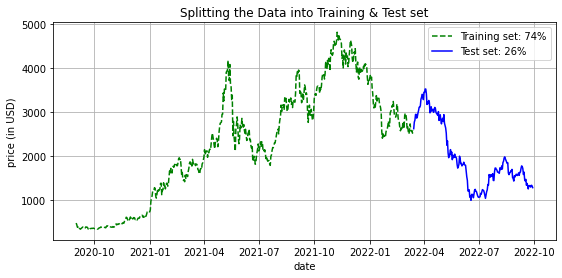

In [ ]:
plt.figure(figsize=(9,4))
plt.grid(True)
to_row = int(len(df)*0.74)
training_data = list(df[0:to_row]['adjclose'])
testing_data = list(df[to_row:]['adjclose'])
plt.plot(df[0:to_row]['adjclose'],color='green', label= 'Training set: 74%',linestyle ='dashed')
plt.plot(df[to_row:]['adjclose'],color='blue', label= 'Test set: 26%')
plt.title("Splitting the Data into Training & Test set")
plt.xlabel("date")
plt.ylabel('price (in USD)')
plt.legend()
plt.show()

In [ ]:
# define input sequence
timeseries_data = list(df[0:to_row]['adjclose'])

In [ ]:
# Working on Univariate data
# preparing independent and dependent features
def prepare_data(timeseries_data, n_steps):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [ ]:
# choosing a number of time steps
n_steps = 3
# splitting into samples
X, y = prepare_data(timeseries_data, n_steps)

In [ ]:
#for i in range(len(X)):
 # print(X[i],y[i])

In [ ]:
print(df[0:to_row]['adjclose'])

timestamp
2020-09-01     477.1
2020-09-02     440.0
2020-09-03     385.7
2020-09-04     388.2
2020-09-05     335.3
               ...  
2022-03-10    2608.0
2022-03-11    2559.6
2022-03-12    2574.8
2022-03-13    2518.9
2022-03-14    2590.7
Name: adjclose, Length: 560, dtype: float64


In [ ]:
# n_features = 1
# #X = X.reshape((X.shape[0], X.shape[1], n_features))



Applying Vanilla LSTM Algorithm:
A Vanilla LSTM is an LSTM model that has a single hidden layer of LSTM units, and an output layer used to make a prediction.



In [ ]:
# defining our model
n_features = 1
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
#model.add(Dense(150, activation= 'relu', input_dim = n_steps))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
# reshape from [samples, timesteps] into [samples, timesteps, features]

X = X.reshape((X.shape[0], X.shape[1], n_features))

In [ ]:

...
# fit model
model.fit(X, y, epochs=200, verbose=1)

Epoch 1/200
18/18 [==============================] - 2s 4ms/step - loss: 5961532.0000
Epoch 2/200
18/18 [==============================] - 0s 4ms/step - loss: 5154573.0000
Epoch 3/200
18/18 [==============================] - 0s 4ms/step - loss: 4262681.5000
Epoch 4/200
18/18 [==============================] - 0s 4ms/step - loss: 3464196.0000
Epoch 5/200
18/18 [==============================] - 0s 4ms/step - loss: 2092121.1250
Epoch 6/200
18/18 [==============================] - 0s 4ms/step - loss: 977646.5625
Epoch 7/200
18/18 [==============================] - 0s 4ms/step - loss: 225410.9531
Epoch 8/200
18/18 [==============================] - 0s 4ms/step - loss: 31830.9336
Epoch 9/200
18/18 [==============================] - 0s 4ms/step - loss: 25776.0020
Epoch 10/200
18/18 [==============================] - 0s 5ms/step - loss: 27312.4844
Epoch 11/200
18/18 [==============================] - 0s 4ms/step - loss: 27578.2285
Epoch 12/200
18/18 [==============================] - 0s 4ms/s

In [ ]:
x_input = np.array([3336.6, 3402.0, 3385.2])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):

    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1


[3389.272]
1 day input [3402.         3385.2        3389.27197266]
1 day output [[3405.1672]]
2 day input [3385.2        3389.27197266 3405.16723633]
2 day output [[3409.032]]
3 day input [3389.272  3405.1672 3409.032 ]
3 day output [[3416.0024]]
4 day input [3405.1672 3409.032  3416.0024]
4 day output [[3424.6978]]
5 day input [3409.032  3416.0024 3424.6978]
5 day output [[3431.6433]]
6 day input [3416.0024 3424.6978 3431.6433]
6 day output [[3439.061]]
7 day input [3424.6978 3431.6433 3439.061 ]
7 day output [[3446.7407]]
8 day input [3431.6433 3439.061  3446.7407]
8 day output [[3454.1763]]
9 day input [3439.061  3446.7407 3454.1763]
9 day output [[3461.6938]]


In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
df[0:to_row]['adjclose']

timestamp
2020-09-01     477.1
2020-09-02     440.0
2020-09-03     385.7
2020-09-04     388.2
2020-09-05     335.3
               ...  
2022-03-10    2608.0
2022-03-11    2559.6
2022-03-12    2574.8
2022-03-13    2518.9
2022-03-14    2590.7
Name: adjclose, Length: 560, dtype: float64

In [ ]:
x_input = np.array([2574.8,2518.9,2590.7])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):

    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1


[2578.8018]
1 day input [2518.9        2590.7        2578.80175781]
1 day output [[2575.7249]]
2 day input [2590.7        2578.80175781 2575.72485352]
2 day output [[2591.2578]]
3 day input [2578.8018 2575.7249 2591.2578]
3 day output [[2594.5132]]
4 day input [2575.7249 2591.2578 2594.5132]
4 day output [[2599.114]]
5 day input [2591.2578 2594.5132 2599.114 ]
5 day output [[2606.4346]]
6 day input [2594.5132 2599.114  2606.4346]
6 day output [[2611.9624]]
7 day input [2599.114  2606.4346 2611.9624]
7 day output [[2617.7031]]
8 day input [2606.4346 2611.9624 2617.7031]
8 day output [[2623.8499]]
9 day input [2611.9624 2617.7031 2623.8499]
9 day output [[2629.7427]]


In [ ]:
#test_set = df[to_row::10]['adjclose']
test_set = df[to_row:][0:10]['adjclose']

test_set


timestamp
2022-03-15    2620.1
2022-03-16    2772.1
2022-03-17    2814.9
2022-03-18    2945.3
2022-03-19    2946.3
2022-03-20    2860.5
2022-03-21    2898.0
2022-03-22    2973.1
2022-03-23    3031.1
2022-03-24    3108.1
Name: adjclose, dtype: float64

In [ ]:
date = df[to_row:][0:10]['adjclose'].index

In [ ]:
lst_output

[2578.8018,
 2575.7249,
 2591.2578,
 2594.5132,
 2599.114,
 2606.4346,
 2611.9624,
 2617.7031,
 2623.8499,
 2629.7427]

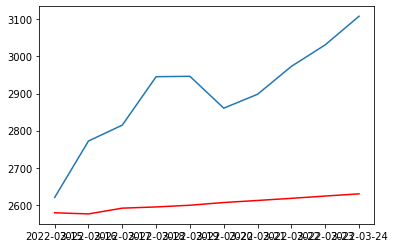

In [ ]:
plt.plot(date,test_set)
plt.plot(date,lst_output, color = 'r')

In [ ]:
# performance Evaluation of 10 days Predictions

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
print("Computing the R-squared value:")
r2_score = r2_score(test_set,lst_output)
print(f'r2_score:{r2_score}')

Computing the R-squared value:
r2_score:-4.772490602301002


In [ ]:
# CALCULATING MEAN ABSOLUTE PERCENTAGE ERROR
MAPE = np.mean(np.abs(np.array(lst_output) - np.array(test_set)) / np.abs(test_set))
print(f'Mean_Absolute_Percentage_Error:{MAPE}')

Mean_Absolute_Percentage_Error:0.09983114855262085


In [ ]:
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(test_set, lst_output)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

316.421581233277


In [ ]:
# CALCULATING MEAN ABSOLUTE ERROR
MAE = mean_absolute_error(test_set,lst_output)
print(f'Mean_Absolute_Error:{MAE}')

Mean_Absolute_Error:294.0395751953125
